<h2>Data Analytics- used motorcycle sales notebook</h2>

<h4><b>Dataset name / short description:</b></h4>

Used motorcycle sales data

<h4><b>Data source (url):</b></h4>

<h>https://moodle.eoppimispalvelut.fi/course/view.php?id=18644 Under the Data Analytics Notebooks section</h>

<h4><b>Data format:</b></h4>

<h>Single csv-file</h>

<h4><b>Data description, features and limitations:</b></h4>

Used motorcycle sales data. Data includes the motorcycles name, selling price, seller type, owner, exshowroom price, manufacture year, and kilometers driven. 

<li>Manufacture year range: 1988-2020</li>
<li>Selling price range: 5000-760000</li>

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [4]:
# importing the usual data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the data
motorcycles = pd.read_csv("motorcycle_sales.csv")

<h3><b>Code: Data clean-up procedure</b></h3>

<h>Removed the names, seller type, and ex show room price columns. Names are too detailed for analysis, seller type only had 6 dealerships, and ex showroom price column had too many NaN values for realiable analysis. The owner seems unusable for this dataset aswell since 90% of the bikes have one previous owner but I chose to leave it in the dataset to check if it clearly affects the price. Now the dataset has only the owner, selling price, year, and kilometers driven which can give us a good view how the age will affect the prices of used motorcycles.</h>

In [14]:
# remove the names column
# data is too detailed for analysis use
motorcycles = motorcycles.drop('name', axis=1)

# remove the seller_type column 
# since 1055 of values are individual and only 6 dealerships -> unbalanced data
motorcycles = motorcycles.drop('seller_type', axis=1)

# remove the ex_showroom_price column.
# 435 NaN values and looking at the selling price column I can't figure out any logic to fill in the blanks
motorcycles = motorcycles.drop('ex_showroom_price', axis=1)


<h3><b>Code: Data analysis</b></h3>

<Axes: >

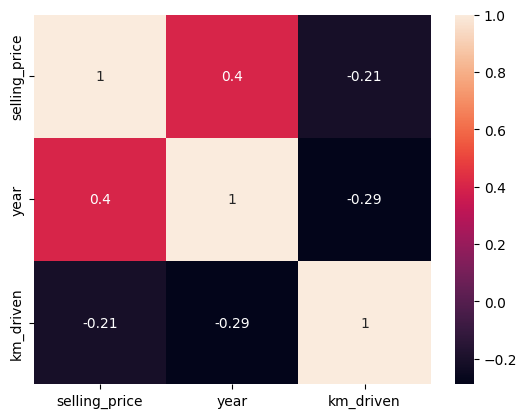

In [15]:
# correlations between selling_price, manufacture year and km driven
correlations = motorcycles.corr(numeric_only=True)
# plot correlation matrix
sns.heatmap(correlations, annot=True)

# the selling price has a strong positive correlation with manufacture year
# and negative correlation kilometers driven.
# -> this makes sense since vehicles tend to use value as they get more used.

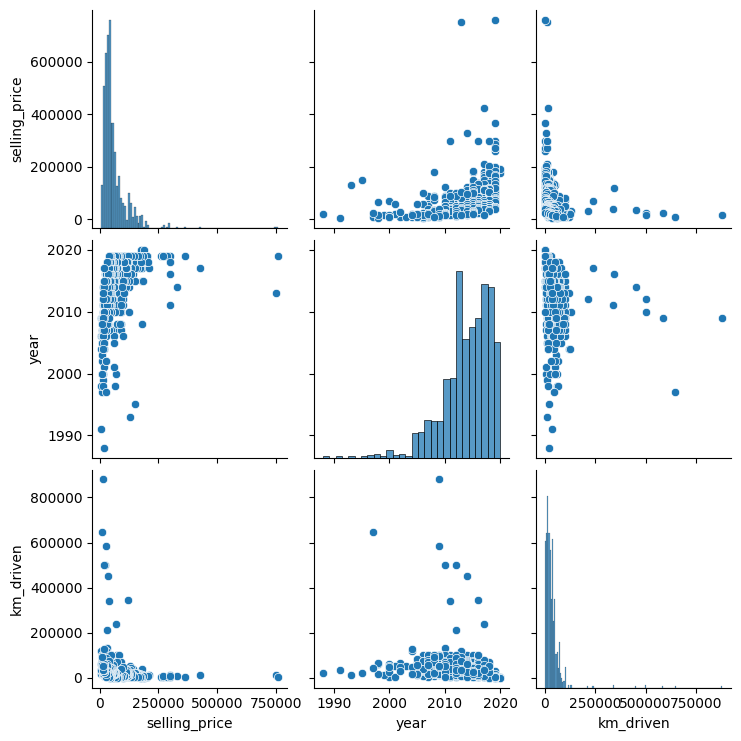

In [18]:
# a simple pairplot to see how the data is scattered
# from the correlations we already know how the data correlates
sns.pairplot(motorcycles)

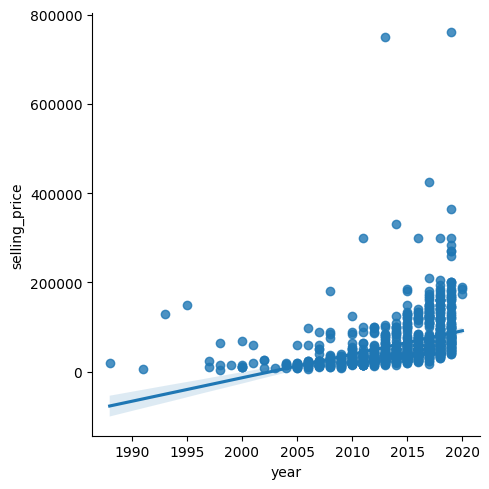

In [23]:
# regression plot for selling price and the year
sns.lmplot(x='year', y='selling_price', data=motorcycles)

<h3><b>Results and summary:</b></h3>

The older and more used the motorcycle is, the lower the selling price will be. The number of previous owners does not seem to affect the price.

<h3><b>Ideas for further improvements:</b></h3>

We could see if the brand affects how the motocycle holds its value over the years.